### Introduction

The Ridgecrest earthquake sequence was a series of earthquakes that occurred in the Ridgecrest area of Southern California in July 2019. The sequence included two major earthquakes, along with a bunch of aftershocks.

The first earthquake, a magnitude 6.4, occurred on July 4, 2019, at 10:33 a.m. local time. The epicenter was located about 11 miles from the city of Ridgecrest, which has a population of around 29,000 people. The earthquake was felt across Southern California and parts of Nevada, and it caused significant damage in the Ridgecrest area.

The second earthquake, a magnitude 7.1, occurred the following day, on July 5, 2019, at 8:19 p.m. local time. The epicenter was located about 9 miles from Ridgecrest. The earthquake was felt across a large portion of Southern California and parts of Nevada, and it caused even more damage than the first earthquake.

The Ridgecrest earthquake sequence included more than 100,000 aftershocks, a scary event all in all, but some great seismic data to study was definitely generated.

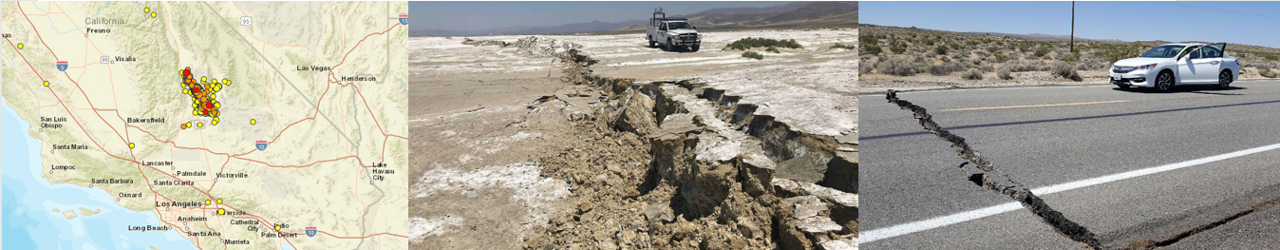

### Imports

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Data ingest

In [3]:
df = pd.read_csv('./data_in/data_IrisObspy_Ridgecrest2019_2018TO5mar2023_20230305a.csv')

print(df.shape)
display(df.head(4))
display(df.tail(4))

(67624, 6)


,datetime,lat,lon,depth,mag,type
0,2018-01-01 19:48:33.070,36.085500,-117.020100,5200.0,0.40,ml
1,2018-01-02 02:16:28.190,35.883500,-117.984667,10890.0,0.68,Ml
2,2018-01-02 02:31:57.870,35.886167,-117.987167,8920.0,1.57,Ml
3,2018-01-02 11:24:05.650,35.773500,-117.668833,8840.0,0.59,Ml


,datetime,lat,lon,depth,mag,type
67620,2023-03-04 06:34:26.940,35.907833,-117.731833,4570.0,1.09,Ml
67621,2023-03-04 14:06:38.490,35.680167,-117.508500,4680.0,0.68,Ml
67622,2023-03-05 01:36:13.190,35.705333,-117.528500,520.0,1.29,Ml
67623,2023-03-05 20:39:33.580,35.864500,-117.681833,8680.0,1.65,Ml


### Preliminary data cleaning and prep

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

Bound the dataset to the end of February-2023 (time of writing is March-2023)

In [23]:
df = df[df['datetime'] < pd.to_datetime('2023-03-01')]

Create a dataset of only "large" magnitude earthquake events, defining greater that magnitude 4.0 as being "large"

In [27]:
df_m4 = df[df['mag']>=4]
df_m4 = df_m4.reset_index(drop=True)
print(df.shape, df_m4.shape)

(67610, 6) (119, 6)


### Aggregate events in time

In [1]:
def aggreg_temporal(df, col_index, col_target):
    '''
    (TBD)
    '''
    
    return df

### Visualization

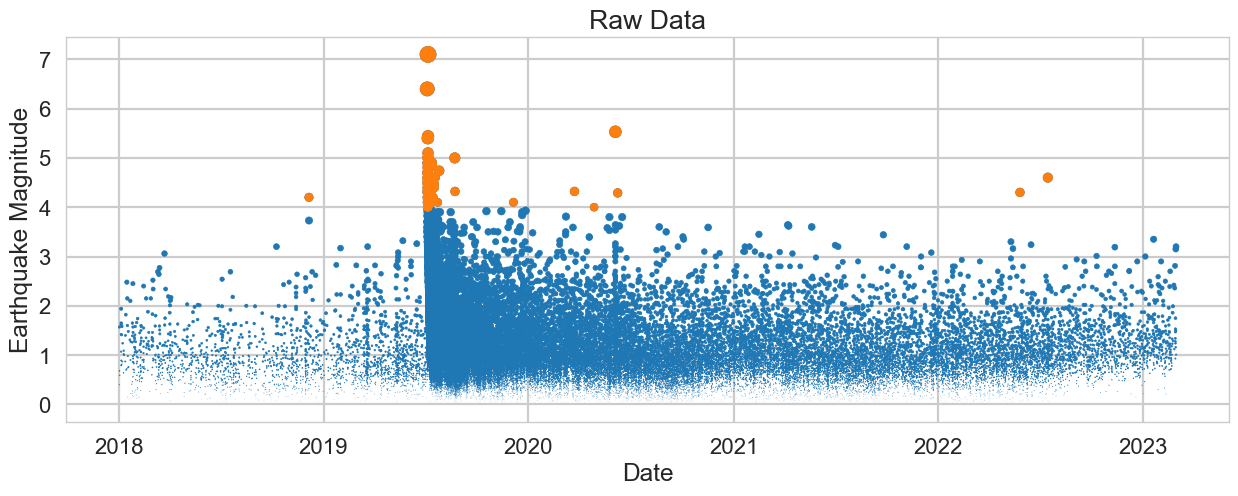

In [60]:
plt.figure(figsize=(15,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

szexpt = 2.5

#plt.scatter(df['datetime'], df['mag'], s=(df['mag'])**2,c=df['mag']);
plt.scatter(df['datetime'], df['mag'], s=(df['mag'])**szexpt);
plt.scatter(df_m4['datetime'], df_m4['mag'], s=(df_m4['mag'])**szexpt);

plt.xlabel('Date')
plt.ylabel('Earthquake Magnitude');
plt.title('Raw Data');

In [31]:
df.tail()

,datetime,lat,lon,depth,mag,type
67605,2023-02-27 23:18:25.730,35.777167,-117.586333,8760.0,1.16,Ml
67606,2023-02-28 02:18:04.500,35.613667,-117.414500,7920.0,3.15,Ml
67607,2023-02-28 03:02:18.420,35.904833,-117.738833,8380.0,1.50,Ml
67608,2023-02-28 13:30:51.690,35.612833,-117.416500,8150.0,3.20,ML
67609,2023-02-28 18:17:08.970,36.029333,-117.813167,5330.0,1.01,Ml


### Aggregate over time

In [35]:
df_ag = []
df_ag = df[['datetime', 'mag']]
df_ag = df_ag.reset_index(drop=True)
df_ag.head(2)

,datetime,mag
0,2018-01-01 19:48:33.070,0.40
1,2018-01-02 02:16:28.190,0.68


In [36]:
df_ag.index = df_ag['datetime']
df_ag = df_ag.drop(['datetime'], axis=1)
df_ag.head(2)

,mag
datetime,
2018-01-01 19:48:33.070,0.40
2018-01-02 02:16:28.190,0.68


In [47]:
df_ag_max_1hr = []
df_ag_max_1hr = df_ag.resample('60min').max()

In [48]:
df_ag_max_1hr = df_ag_max_1hr.fillna(0)

In [49]:
df_ag_max_1hr

,mag
datetime,
2018-01-01 19:00:00,0.40
2018-01-01 20:00:00,0.00
2018-01-01 21:00:00,0.00
2018-01-01 22:00:00,0.00
2018-01-01 23:00:00,0.00
...,...
2023-02-28 14:00:00,0.00
2023-02-28 15:00:00,0.00
2023-02-28 16:00:00,0.00


In [52]:
#df_ag_max_1hr.plot()

In [54]:
print(df.shape, df_ag_max_1hr.shape)

(67610, 6) (45216, 1)


In [55]:
df_ag_max_1hr = df_ag_max_1hr.reset_index()
df_ag_max_1hr.head(2)

,datetime,mag
0,2018-01-01 19:00:00,0.4
1,2018-01-01 20:00:00,0.0


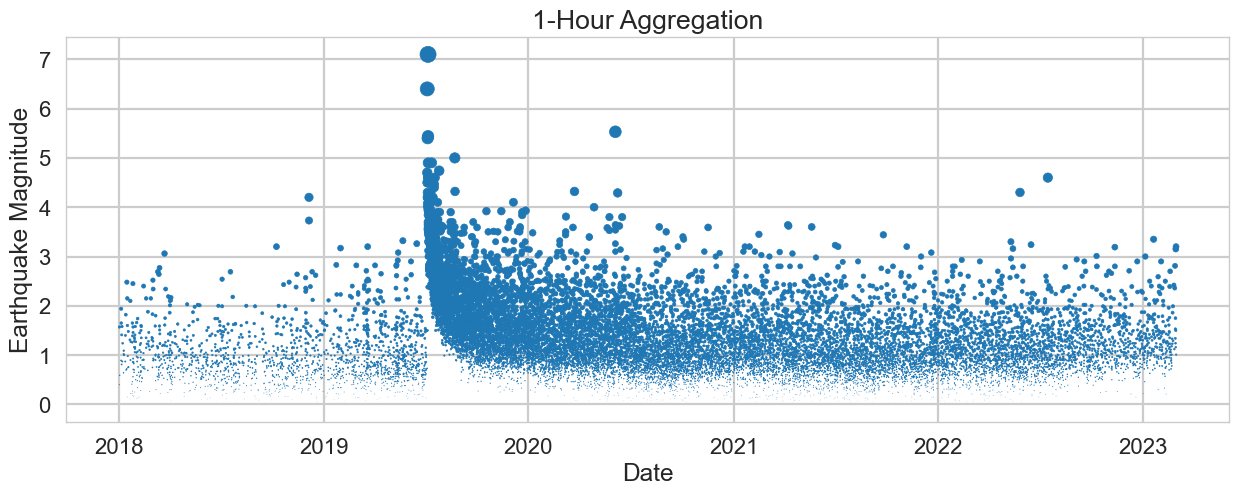

In [61]:
plt.figure(figsize=(15,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

szexpt = 2.5

#plt.scatter(df['datetime'], df['mag'], s=(df['mag'])**2,c=df['mag']);

plt.scatter(df_ag_max_1hr['datetime'], df_ag_max_1hr['mag'], s=(df_ag_max_1hr['mag'])**szexpt);

#plt.scatter(df_m4['datetime'], df_m4['mag'], s=(df_m4['mag'])**szexpt);

plt.xlabel('Date')
plt.ylabel('Earthquake Magnitude');
plt.title('1-Hour Aggregation');

In [62]:
df['cnt'] = 1
df.head(3)

,datetime,lat,lon,depth,mag,type,cnt
0,2018-01-01 19:48:33.070,36.085500,-117.020100,5200.0,0.40,ml,1
1,2018-01-02 02:16:28.190,35.883500,-117.984667,10890.0,0.68,Ml,1
2,2018-01-02 02:31:57.870,35.886167,-117.987167,8920.0,1.57,Ml,1


In [65]:
df_cnt =[]
df_cnt = df[['datetime', 'cnt']]

In [66]:
df_cnt.index = df_cnt['datetime']
df_cnt = df_cnt.drop(['datetime'], axis=1)
df_cnt.head(2)

,cnt
datetime,
2018-01-01 19:48:33.070,1
2018-01-02 02:16:28.190,1


In [72]:
df_cnt_sum_1hr = []
df_cnt_sum_1hr = df_cnt.resample('60min').sum()

In [73]:
df_cnt_sum_1hr = df_cnt_sum_1hr.reset_index()

In [74]:
df_cnt_sum_1hr

,datetime,cnt
0,2018-01-01 19:00:00,1
1,2018-01-01 20:00:00,0
2,2018-01-01 21:00:00,0
3,2018-01-01 22:00:00,0
4,2018-01-01 23:00:00,0
...,...,...
45211,2023-02-28 14:00:00,0
45212,2023-02-28 15:00:00,0
45213,2023-02-28 16:00:00,0
45214,2023-02-28 17:00:00,0


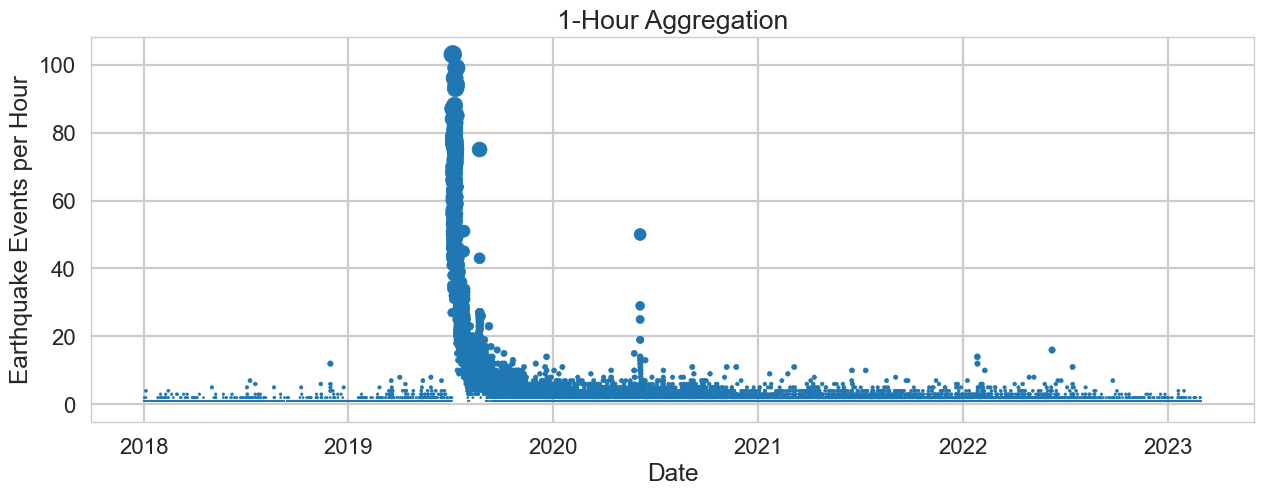

In [83]:
plt.figure(figsize=(15,5))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

szexpt = 2.5

#plt.scatter(df['datetime'], df['mag'], s=(df['mag'])**2,c=df['mag']);

#plt.scatter(df_ag_max_1hr['datetime'], df_ag_max_1hr['mag'], s=(df_ag_max_1hr['mag'])**szexpt);

#plt.scatter(df_cnt_sum_1hr['datetime'], df_cnt_sum_1hr['cnt'], s=(df_cnt_sum_1hr['cnt'])**szexpt);
plt.scatter(df_cnt_sum_1hr['datetime'], df_cnt_sum_1hr['cnt'], s=(df_cnt_sum_1hr['cnt'])**1.1);
#plt.scatter(df_cnt_sum_1hr['datetime'], df_cnt_sum_1hr['cnt']);

#plt.scatter(df_m4['datetime'], df_m4['mag'], s=(df_m4['mag'])**szexpt);

plt.xlabel('Date')
plt.ylabel('Earthquake Events per Hour');
plt.title('1-Hour Aggregation');